# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn
import cv2

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

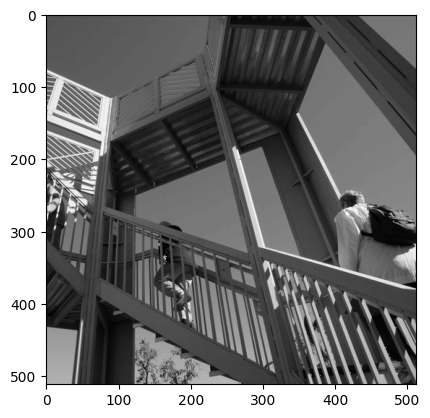

In [3]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

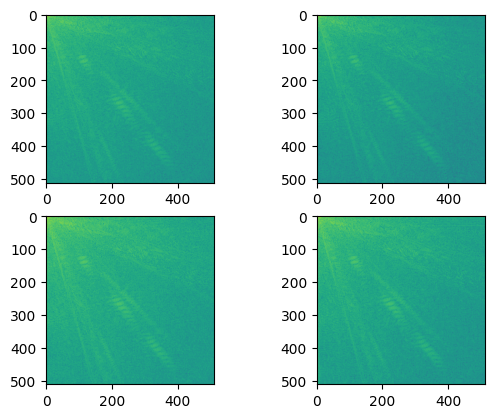

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

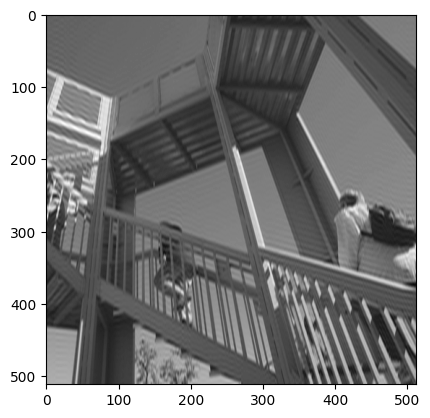

In [5]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

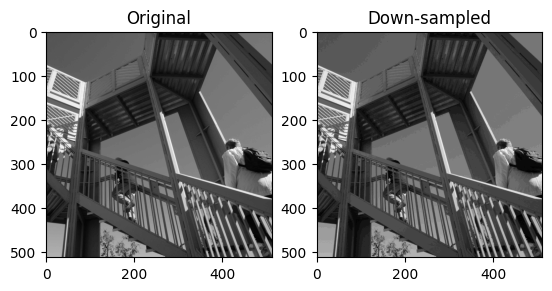

In [6]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

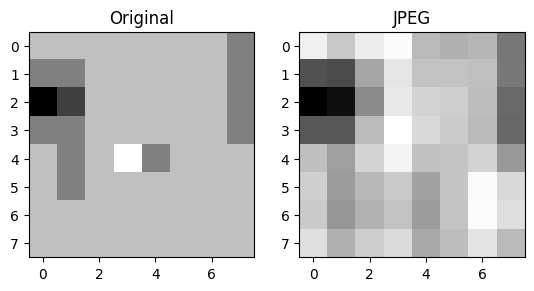

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [7]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

## Sarcina 1

In [8]:
def make_jpeg(image, Q=Q_jpeg):

    height, width = image.shape
    final = np.zeros_like(image)

    before_nnz = 0
    after_nnz = 0

    for i in range(0, height, 8):
        for j in range (0, width, 8):
            pixels = image[i : (i + 8), j : (j + 8)]

            Y_pixels = dctn(pixels)
            before_nnz += np.count_nonzero(Y_pixels)

            jpeg_pixels = Q * np.round(Y_pixels / Q)
            after_nnz += np.count_nonzero(jpeg_pixels)

            compressed_pixels = idctn(jpeg_pixels)

            final[i : (i + 8), j : (j + 8)] = compressed_pixels

    # print('Componente în frecvență:' + str(before_nnz) + '\nComponente în frecvență după cuantizare: ' + str(after_nnz))

    return final

Componente în frecvență:250378
Componente în frecvență după cuantizare: 125029


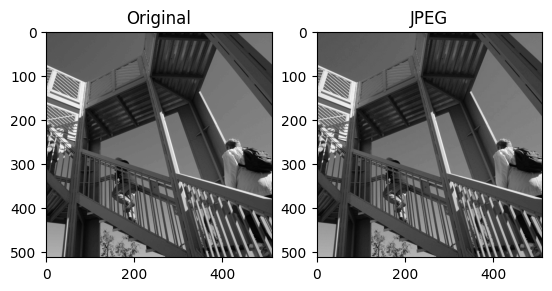

In [9]:
final_jpeg = make_jpeg(X)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(X, cmap=plt.cm.gray)
axs[0].set_title("Original")
axs[1].imshow(final_jpeg, cmap=plt.cm.gray)
axs[1].set_title("JPEG")

plt.show()

## Sarcina 2

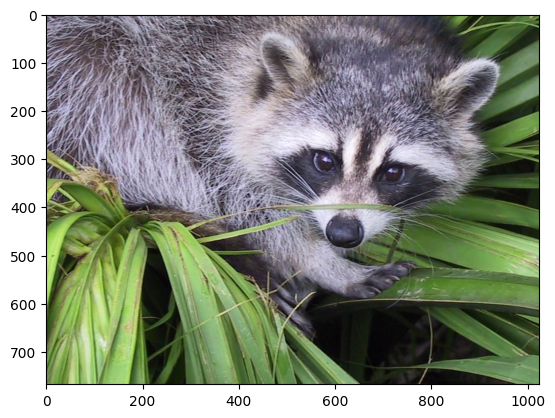

In [10]:
X2 = misc.face()
plt.imshow(X2)
plt.show()

In [11]:
def rgb_to_ycbcr(image):
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]

    y = 16 + 65.738 * r / 256 + 129.057 * g / 256 + 25.064 * b / 256
    cb = 128 - 37.945 * r / 256 - 74.494 * g / 256 + 112.439 * b / 256
    cr = 128 + 112.439 * r / 256 - 94.154 * g / 256 - 18.285 * b / 256

    return np.dstack((y, cb, cr))

def ycbcr_to_rgb(y, cb, cr):
    r = 298.082 * y / 256 + 408.583 * cr / 256 - 222.921
    r = r.round().astype(np.uint8)
    g = 298.082 * y / 256 - 100.291 * cb / 256 - 208.120 * cr / 256 + 135.576
    g = g.round().astype(np.uint8)
    b = 298.082 * y / 256 + 516.412 * cb / 256 - 276.836
    b = b.round().astype(np.uint8)

    return np.dstack((r, g, b))



Componente în frecvență:779160
Componente în frecvență după cuantizare: 194477
Componente în frecvență:751866
Componente în frecvență după cuantizare: 88044
Componente în frecvență:767869
Componente în frecvență după cuantizare: 75191


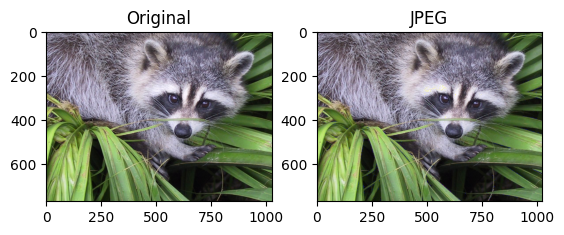

0.3152724372016059


In [12]:
def compress_image(image, Q=Q_jpeg):

    ycbcr_image = rgb_to_ycbcr(image)

    Y_jpeg = make_jpeg(ycbcr_image[:, :, 0], Q)
    Cb_jpeg = make_jpeg(ycbcr_image[:, :, 1], Q)
    Cr_jpeg = make_jpeg(ycbcr_image[:, :, 2], Q)

    return ycbcr_to_rgb(Y_jpeg, Cb_jpeg, Cr_jpeg)

jpeg_image = compress_image(X2)

fig2, axs2 = plt.subplots(1, 2)
axs2[0].imshow(X2)
axs2[0].set_title("Original")
axs2[1].imshow(jpeg_image)
axs2[1].set_title("JPEG")

plt.show()

print(np.mean((X2 - jpeg_image) ** 2))

## Sarcina 3

Am gasit un algoritm aici https://stackoverflow.com/questions/29215879/how-can-i-generalize-the-quantization-matrix-in-jpeg-compression/29216609#29216609.

In [13]:
def define_matrix(q):
    if q < 50:
        s = 5000 / q
    else:
        s = 200 - 2 * q

    new_matrix = np.floor((s * np.array(Q_jpeg) + 50) / 100).astype(np.uint8)
    new_matrix[new_matrix == 0] = 1

    return new_matrix

In [14]:
def calculate_mse(i1, i2):
    return np.mean((i1 - i2) ** 2)

In [15]:
def make_jpeg_quality(image, q):
    matrix = define_matrix(q)
    return compress_image(image, matrix)

Componente în frecvență:779160
Componente în frecvență după cuantizare: 724395
Componente în frecvență:751866
Componente în frecvență după cuantizare: 548595
Componente în frecvență:767869
Componente în frecvență după cuantizare: 529227
Componente în frecvență:779160
Componente în frecvență după cuantizare: 699155
Componente în frecvență:751866
Componente în frecvență după cuantizare: 521657
Componente în frecvență:767869
Componente în frecvență după cuantizare: 494736
Componente în frecvență:779160
Componente în frecvență după cuantizare: 632972
Componente în frecvență:751866
Componente în frecvență după cuantizare: 462530
Componente în frecvență:767869
Componente în frecvență după cuantizare: 429062
Componente în frecvență:779160
Componente în frecvență după cuantizare: 566471
Componente în frecvență:751866
Componente în frecvență după cuantizare: 411384
Componente în frecvență:767869
Componente în frecvență după cuantizare: 377985
Componente în frecvență:779160
Componente în frecven

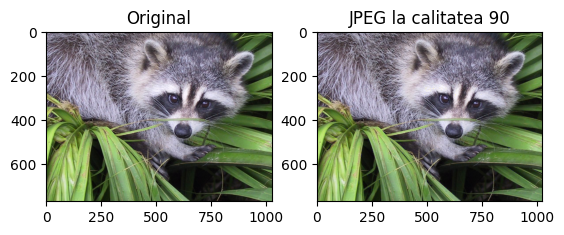

Valoarea MSE este 0.09650505913628472


In [16]:
# valoarea maxima a erorii
given_mse = 0.1

quality = 100
new_quality = quality

new_image = make_jpeg_quality(X2, quality)
mse = calculate_mse(X2, new_image)

while mse < given_mse:
    new_quality = quality

    quality -= 1
    new_image = make_jpeg_quality(X2, quality)
    mse = calculate_mse(X2, new_image)

quality_image = make_jpeg_quality(X2, new_quality)
mse = calculate_mse(X2, quality_image)

fig3, axs3 = plt.subplots(1, 2)
axs3[0].imshow(X2)
axs3[0].set_title("Original")
axs3[1].imshow(quality_image)
axs3[1].set_title(f"JPEG la calitatea {new_quality}")

plt.show()

print(f"Valoarea MSE este {mse}")

## Sarcina 4

In [17]:
video = cv2.VideoCapture('cat.mp4')

codec = cv2.VideoWriter_fourcc('V', 'P', '9', '0')
out = cv2.VideoWriter('cat_compressed.avi', codec, 30, (360, 360))

while True:

    # True and frame if it reads one frame, else False
    ret_value, frame = video.read()

    if not ret_value:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    compressed_frame = make_jpeg_quality(frame, 90)

    compressed_frame = cv2.cvtColor(compressed_frame, cv2.COLOR_RGB2BGR)
    out.write(compressed_frame)

video.release()
out.release()

from IPython.display import Video
Video('cat_compressed.avi')

Componente în frecvență:82442
Componente în frecvență după cuantizare: 38794
Componente în frecvență:63401
Componente în frecvență după cuantizare: 11934
Componente în frecvență:69332
Componente în frecvență după cuantizare: 10181
Componente în frecvență:82442
Componente în frecvență după cuantizare: 38794
Componente în frecvență:63408
Componente în frecvență după cuantizare: 11934
Componente în frecvență:69347
Componente în frecvență după cuantizare: 10181
Componente în frecvență:101433
Componente în frecvență după cuantizare: 46201
Componente în frecvență:78358
Componente în frecvență după cuantizare: 16174
Componente în frecvență:85164
Componente în frecvență după cuantizare: 14871
Componente în frecvență:101393
Componente în frecvență după cuantizare: 46154
Componente în frecvență:78328
Componente în frecvență după cuantizare: 16225
Componente în frecvență:85145
Componente în frecvență după cuantizare: 14852
Componente în frecvență:101396
Componente în frecvență după cuantizare: 46